In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
db = client.get_database('ShebaAllergyDB')
patients=db.patients

In [34]:
data = pd.DataFrame(list(patients.find({"year":"17"})))
data.age=120-pd.to_numeric(data.age)
data=data.fillna(0)
# df=df[df.age<100]

In [35]:
data[['rubber','cosmetics_0']]

,rubber,cosmetics_0
0,0,
1,0,
2,0,
3,0,"8,16"
4,0,
...,...,...
80,0,"18,20,31,57"
81,0,
82,0,
83,0,


## DEMOGRAPHICS

(array([11.,  9.,  6., 12., 10., 11.,  3.,  8.,  3.,  4.]),
 array([21. , 27.1, 33.2, 39.3, 45.4, 51.5, 57.6, 63.7, 69.8, 75.9, 82. ]),
 <a list of 10 Patch objects>)

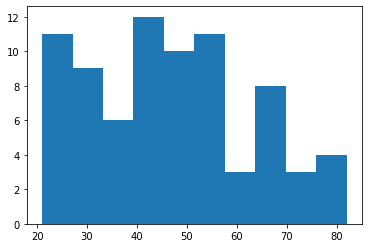

In [28]:
plt.hist(df.age, bins=10)

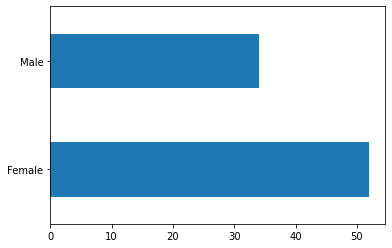

In [38]:
CountStatus = pd.value_counts(df['gender'].values, sort=True)


CountStatus.plot.barh()

## TESTS

In [144]:
test_columns=['standard', 'perishable', 'cosmetics', 'plants', 'baking','perfumes']

In [147]:
df=data[test_columns].fillna(0)

In [148]:
test=df[test_columns]

In [149]:
final=test.apply(pd.Series.value_counts)
final=final.fillna(0)

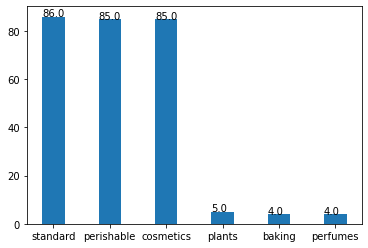

In [150]:
bars = plt.bar(final.columns, height=final.iloc[0], width=.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .1, yval)

## test results

In [7]:
result_cols=['standard_0', 'standard_1', 'standard_2', 'standard_3', 'perishable_0',
       'perishable_1', 'perishable_2', 'perishable_3', 'cosmetics_0',
       'cosmetics_1', 'cosmetics_2', 'cosmetics_3', 'plants_0', 'plants_1',
       'plants_2', 'plants_3', 'baking_0', 'baking_1', 'baking_2', 'baking_3',
        'perfumes_0', 'perfumes_1', 'perfumes_2',
       'perfumes_3', 'lotions', 'textile', 'lotions_0', 'lotions_1',
       'lotions_2', 'lotions_3', 'textile_0', 'textile_1', 'textile_2',
       'textile_3', 'steroids', 'steroids_0', 'steroids_1', 'steroids_2',
       'steroids_3', 'shoes', 'shoes_0', 'shoes_1', 'shoes_2', 'shoes_3',
       'rubber', 'rubber_0', 'rubber_1', 'rubber_2', 'rubber_3', 'acrylic',
       'acrylic_0', 'acrylic_1', 'acrylic_2', 'acrylic_3']

In [11]:
results=data[result_cols]
results

,standard_0,standard_1,standard_2,standard_3,perishable_0,perishable_1,perishable_2,perishable_3,cosmetics_0,cosmetics_1,...,rubber,rubber_0,rubber_1,rubber_2,rubber_3,acrylic,acrylic_0,acrylic_1,acrylic_2,acrylic_3
0,,,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,19,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,15",,,,,,,,"8,16",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,,,,,,,,,"--8,39",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
split_cols=['cosmetics_1']
split_results=pd.DataFrame()
for col in split_cols:
    
    new_df=pd.DataFrame(results[col].str.split('--',1).tolist(),
                                 columns = [f'{col}_early',f'{col}_late'])
    split_results=split_results.append(cols)

cosmetics_1


In [19]:
splitted=results[col].str.split('--',1).tolist()

In [28]:
results['rubber'].unique()

array([nan, '1'], dtype=object)

In [24]:
g=[print((item)) for item in splitted]

['']
['']
['']
['']
['', '8,39']
['37']
['']
['39,54,56,57', '56.57']
['']
['']
['']
['17,34,54', '17,34,54']
['13', '2,13,43']
['2', '3']
['']
['']
['48']
['', '45']
['']
['']
['11,26']
['23,46']
['20']
['']
['', '39,54']
['']
['19', '19,26,39']
['']
['']
nan
['54,58', '54']
['']
['14,42', '14,42']
['', '13']
['']
['']
['', '54']
['', '39']
['']
['']
['']
['']
['']
['']
['']
['13', '13']
['']
['']
['']
['']
['']
['']
['']
['', '56']
['']
['24,28']
['']
['']
['23', '23']
['2,21,36', '2,39']
['']
['']
['', '15']
['', '53']
['']
['']
['', '13']
['']
['']
['', '8,12,15']
['5']
['']
['']
['']
['']
['']
['']
['', '13']
['']
['']
['']
['10,21,30,52,56']
['30']
['']
['']


In [1]:
data=[]
col_names=[]

for col in results.columns:
    cols=results[col].str.split('--',1).tolist()
    colnames=[f'{col}_early',f'{col}_late']
    data.append(cols)
    col_names.append(colnames)
    
final = pd.DataFrame(data=data, columns=col_names)


NameError: name 'results' is not defined

In [124]:
g=results['standard_1'].str.split('--',1).tolist()
colnames=['3','32']

In [125]:
pd.DataFrame(data=g, columns=colnames)

,3,32
0,,None
1,,None
2,19,None
3,,None
4,,None
...,...,...
81,,None
82,"1,9,10,11,12",None
83,15,15
84,,None
